In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_theme()

<h1 dir="rtl"> تنظیمات اولیه </h1>

In [2]:
# probability distribution function --------------

p = lambda x: np.exp(-x**2)

In [3]:
# configs ----------------------------------------

x0 = 0

<h1 dir="rtl"> تابع تولید اعداد تصادفی </h1>

In [123]:
def random_numbers(number_of_numbers: int, d: float):
    '''
        Explanation:
            generate number_of_numbers random numbers with metropolice algorithem
            for p(x) probability distribution function
        
        Parameters:
            number_of_numbers: number of random numbers we want
            d: step length in the algorithem
                
        Return:
            numbers, accepting_ratio
    '''
    
    x = x0
    numbers = np.zeros(number_of_numbers)
    all_iterations = 0
    
    def accepted(n: int, y: float) -> None:
        numbers[n] = y
    
    n = 0
    while n < number_of_numbers:
        y = x + d*(np.random.random()*2 - 1)
        
        if np.random.random() < p(y)/p(x):
            x = y
            accepted(n, y)
            n += 1
        
        all_iterations += 1
        
    accepting_ratio = number_of_numbers/all_iterations
    
    return numbers, accepting_ratio

<h2 dir="rtl"> آزمایش کارایی تابع </h2>

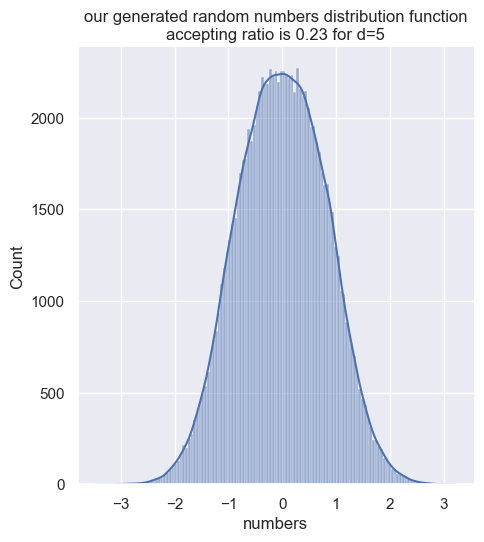

In [5]:
# test the function -------------------------------

numbers, accepting_ratio = random_numbers(100000, d=5)

sn.displot(numbers, kde=True)
plt.xlabel("numbers")
plt.title(f"our generated random numbers distribution function\naccepting ratio is {round(accepting_ratio, 2)} for d=5")
plt.show()

<h1 dir="rtl"> پیدا کردن طول قدم های مناسب برای نرخ های قبولی مدنظر </h1>

In [6]:
def accepting_ratios_vs_d():
    max_d = float(input("max_d: "))
    all_d = np.arange(0.1, max_d, 0.1)
    all_accepting_ratios = np.zeros(all_d.size)
    
    for n in range(all_d.size):
        all_accepting_ratios[n] = random_numbers(1000, all_d[n])[1]
        
    plt.plot(all_d, all_accepting_ratios)
    
    plt.title("accepting ratio vs d")
    plt.xlabel("d")
    plt.ylabel("accepting ratio")
    
    plt.show()
    
    data = pd.DataFrame({
        "نرخ قبولی": all_accepting_ratios,
        "طول قدم": all_d
    })
    
    return data

max_d:  15


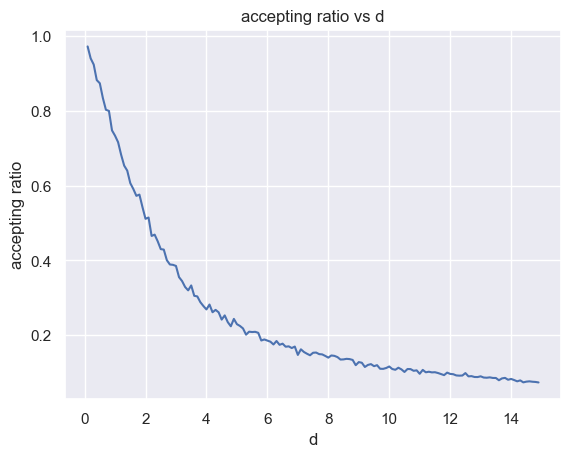

In [7]:
data = accepting_ratios_vs_d()

In [9]:
data.to_csv("data.csv")
data

,نرخ قبولی,طول قدم
0,0.971817,0.1
1,0.939850,0.2
2,0.923361,0.3
3,0.881834,0.4
4,0.873362,0.5
...,...,...
144,0.075534,14.5
145,0.076383,14.6
146,0.075313,14.7
147,0.074733,14.8


<h1 dir="rtl"> طول همبستگی </h1>

In [104]:
def c(x: np.ndarray, j:int):
    N = x.size
    xi = x[0: N-j]
    xij = x[j: N]
    
    sigma2 = (x**2).mean() - (x.mean()**2)
        
    return ((xi*xij).mean() - xi.mean()*xij.mean())/sigma2

In [65]:
def linear_fit(x: np.ndarray, y: np.ndarray) -> list:
    '''
        Explanation:
            get x and y as numpy arrays and fit a line of them
        Return:
            a list of the form [a, b, R2] that a and b are from: Y = aX + b
    '''
    
    # create model -------------------
    reg = LinearRegression()
    
    # fit the data to the model ------
    reg.fit(x.reshape(-1, 1), y)

    # get the outputs ----------------
    a  = reg.coef_[0]
    b  = reg.intercept_ 
    R2 = reg.score(x.reshape(-1, 1), y)
    
    return a, b, R2

In [66]:
all_d = [0.3, 0.7, 1.1, 1.5, 2, 2.7, 3.8, 5.7, 11.1]

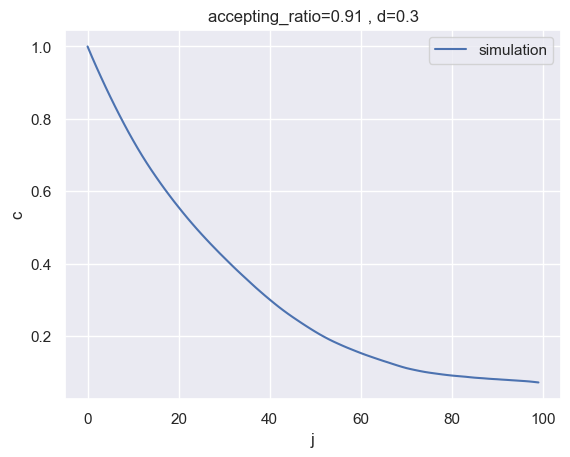

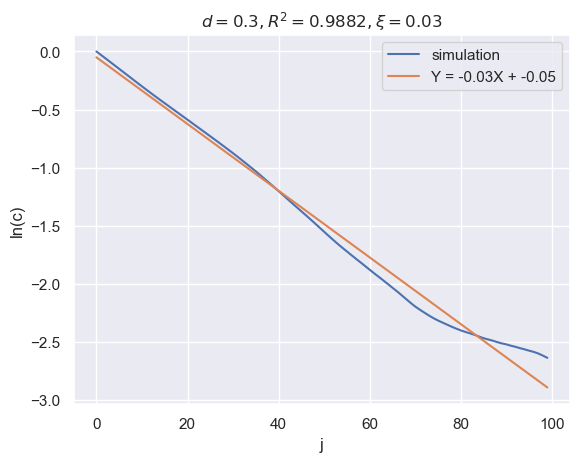

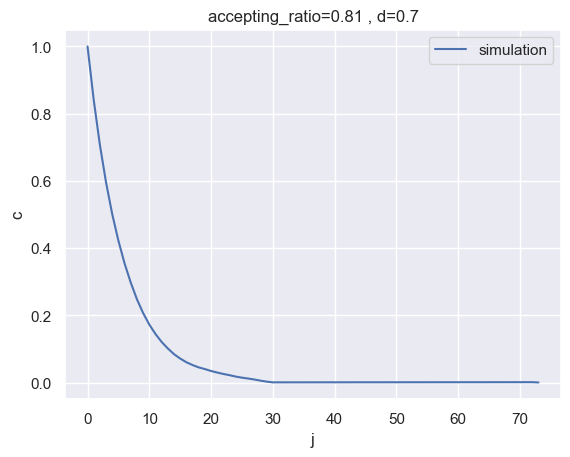

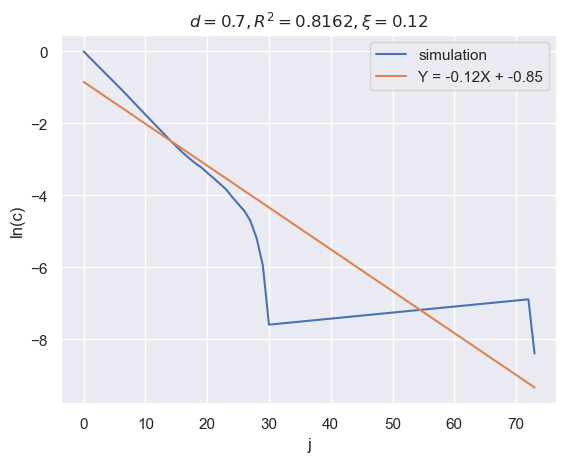

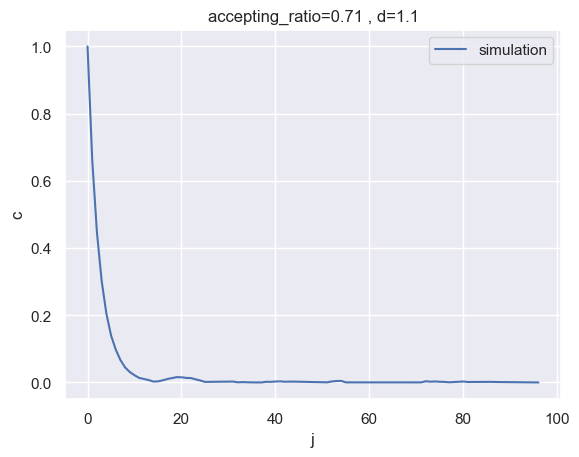

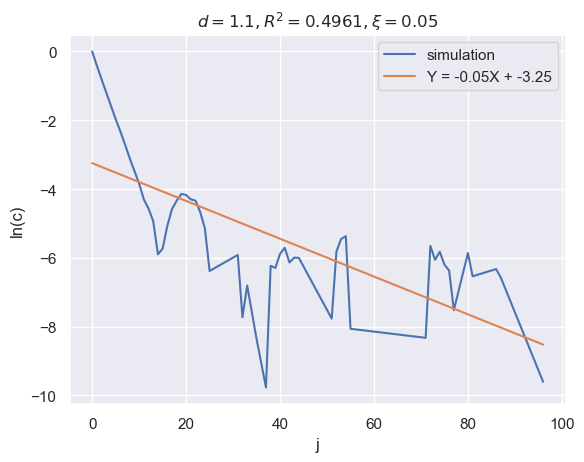

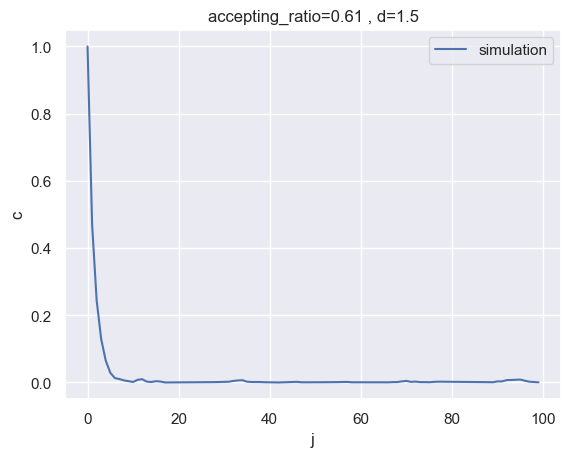

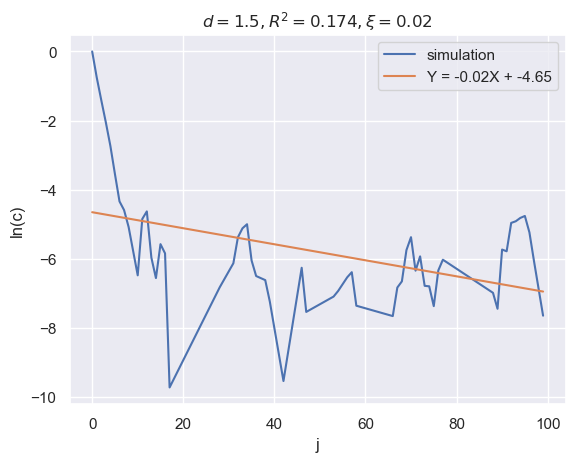

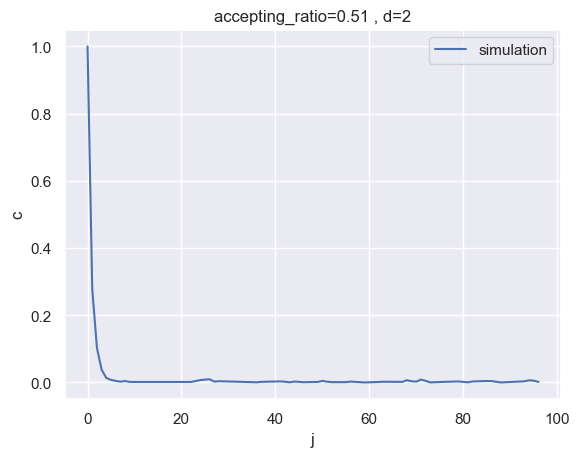

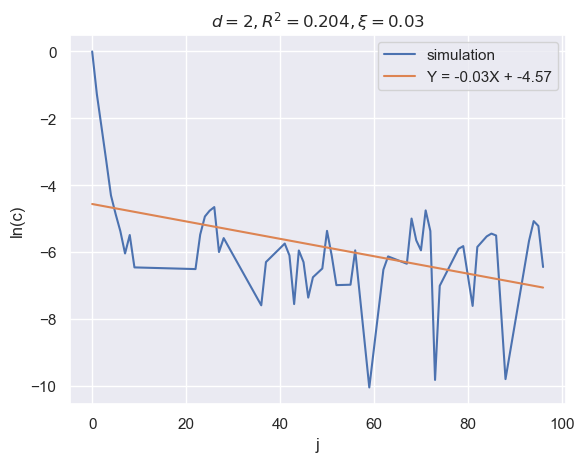

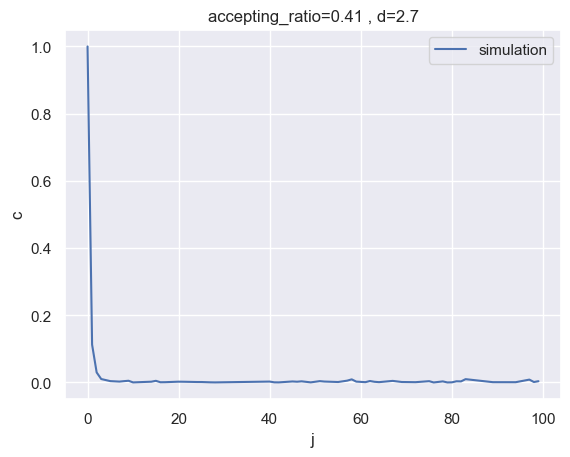

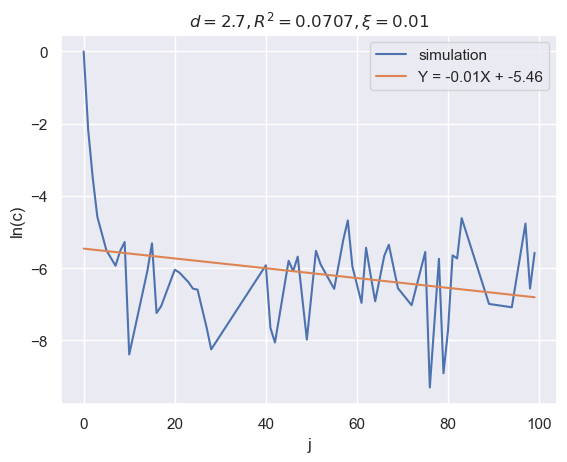

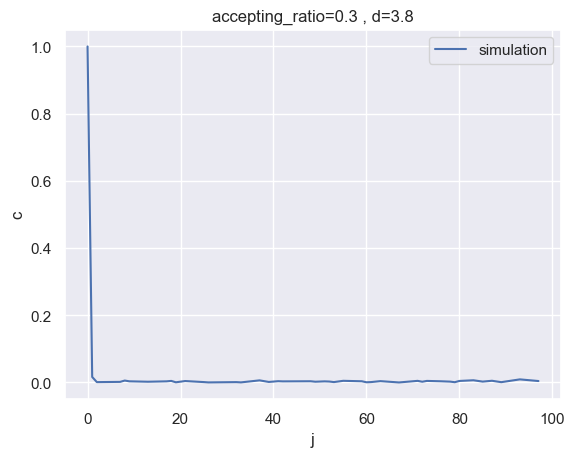

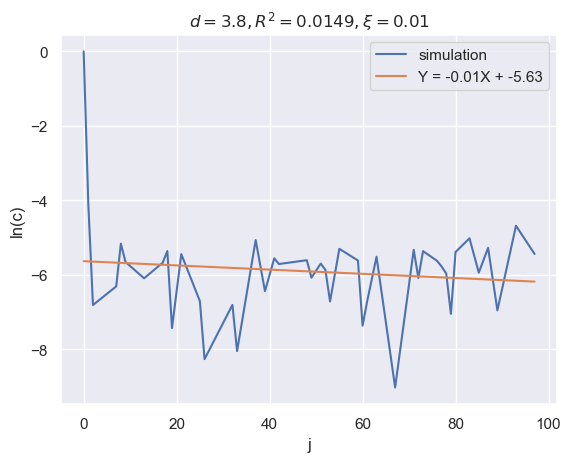

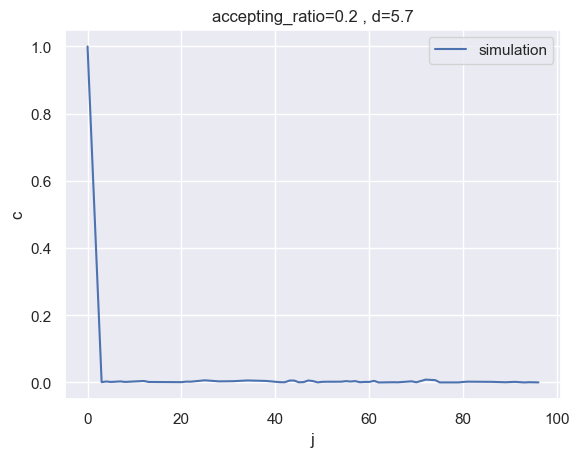

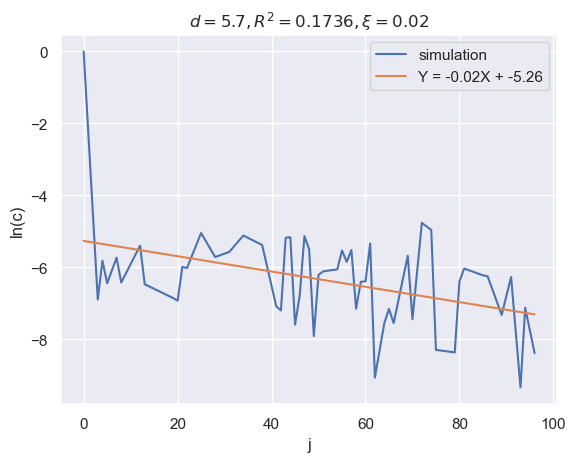

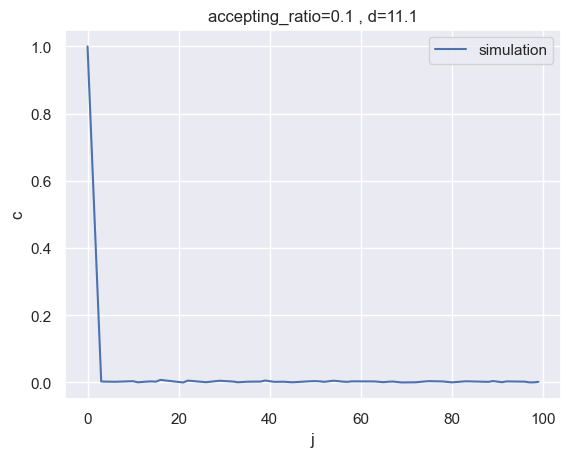

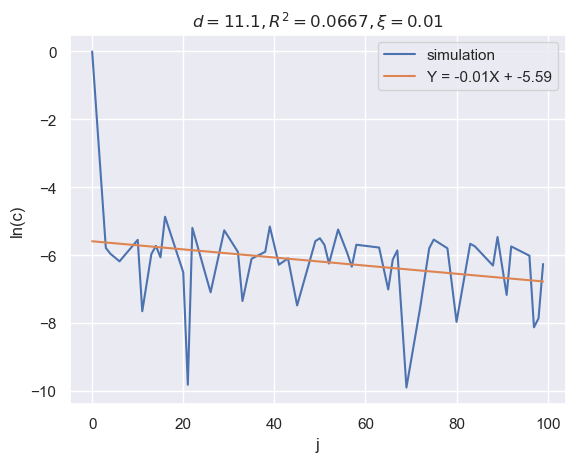

In [126]:
# main loop ---------------------------

for d in all_d:
    all_c = []
    all_j = []

    # do the simulation -------------------
    numbers, accepting_ratio = random_numbers(100000, d)

    # do the calculations for c(j)---------
    for j in range(100):
        C = c(numbers, j)
        # just keep C > 0 for ln domain ---
        if C > 0:
            all_c.append(C)
            all_j.append(j)

    # final data --------------------------
    all_j = np.array(all_j)
    ln_all_c = np.log(all_c)

    # fit the best line to the data -------
    a, b, R2 = linear_fit(all_j, ln_all_c)

    # ploting the results -----------------
    plt.figure()

    plt.plot(all_j, all_c, label="simulation")

    plt.ylabel("c")
    plt.xlabel("j")
    plt.title(f"accepting_ratio={round(accepting_ratio, 2)} , d={d}")
    plt.legend()

    plt.figure()

    plt.plot(all_j, ln_all_c, label="simulation")
    plt.plot(all_j, a*all_j+b, label=f"Y = {round(a, 2)}X + {round(b, 2)}")

    plt.ylabel("ln(c)")
    plt.xlabel("j")
    plt.title(fr"$d={d}, R^2 = {round(R2, 4)}, \xi = {-round(a, 2)}$")
    plt.legend()

    plt.show()